**Name**: Vishnu Teja Surla  
**Roll**: CS21B2037

# Implement the CNN for classifying the flowers from IRIS Flowers Image dataset. 

- Implement a custom CNN using Conv2D layers (the configuration of the model can be followed from the tutorial or can be changed as well)
- Implement the Transfer Learning Method for VGG16.

### Information Regarding the dataset -

- The .zip file contains Three folders namely iris-setosa, iris-versicolor and iris-virginica. 
- Each of the images present in that folder belong to that class.
- Pay attention to the shape of the images present in the dataset and the size which you mentioned while creating the model. 


# Importing Modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Data Generation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory containing the images
path = "/kaggle/input/iris-images-dataset"

imggen = ImageDataGenerator()

data = imggen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 421 images belonging to 3 classes.


In [7]:
data.class_indices

{'iris-setosa': 0, 'iris-versicolour': 1, 'iris-virginica': 2}

# Test-Train Split

In [8]:
from sklearn.model_selection import train_test_split

X = []
y = []
for i in range(len(data)):
    batch_x, batch_y = data[i]
    X.extend(batch_x)
    y.extend(batch_y)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN Model Implementation

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

model = Sequential([
        InputLayer(shape=(224, 224, 3)),

        # Convolution Block-1
        Conv2D(30, (5, 5), activation='relu', strides=(1, 1), padding='same'),
        MaxPool2D(pool_size=(2, 2), padding='same'),
        
        # Convolution Block-2
        Conv2D(60, (5, 5), activation='relu', strides=(2, 2), padding='same'),
        MaxPool2D(pool_size=(2, 2), padding='same'),
        
        # Convolution Block-3
        Conv2D(65, (3, 3), activation='relu', strides=(2, 2), padding='same'),
        MaxPool2D(pool_size=(2, 2), padding='valid'),

        # ANN Block
        Flatten(),
        Dense(units=256, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=3, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 30)   │         2,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 30)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 60)     │        45,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 65)     │        35,165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 65)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3185)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       815,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 914,764 (3.49 MB)

 Trainable params: 914,764 (3.49 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3830 - loss: 34.1507

I0000 00:00:1711988782.585576      96 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711988782.605939      96 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 819ms/step - accuracy: 0.4111 - loss: 26.8032

W0000 00:00:1711988791.601746      97 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.4165 - loss: 25.7926 - val_accuracy: 0.4471 - val_loss: 1.4928
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6151 - loss: 0.9176 - val_accuracy: 0.5529 - val_loss: 1.0563
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6566 - loss: 0.8243 - val_accuracy: 0.5412 - val_loss: 1.1201
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6867 - loss: 0.7039 - val_accuracy: 0.5412 - val_loss: 1.2080
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7513 - loss: 0.6015 - val_accuracy: 0.3647 - val_loss: 1.3375
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7510 - loss: 0.5725 - val_accuracy: 0.4588 - val_loss: 1.2877
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8541 - loss: 0.4838 - val_accuracy: 0.4000 - val_loss: 1.4162
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8622 - loss: 0.3947 - val_accuracy: 0.5176 - val_loss: 2.

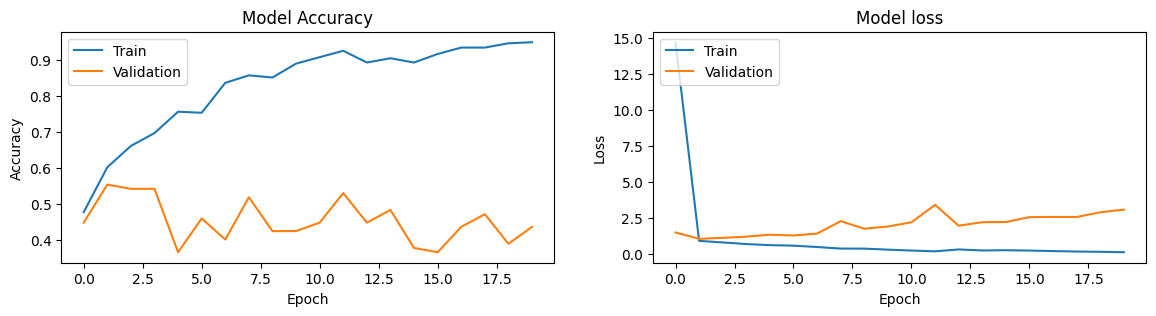

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 3))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left') 

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Transfer Learning using VGG16 for classifying the Imagenette Dataset

## Downloading Weights of VGG16

In [17]:
from keras.applications import VGG16

pretrained_model = VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))
pretrained_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

## Generate features from VGG16

In [26]:
from keras.utils import to_categorical
vgg_features_train = pretrained_model.predict(X_train)
vgg_features_val = pretrained_model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


## Classify images using features from VGG16

In [27]:
vgg_model = Sequential([
    Flatten(input_shape=(7, 7, 512)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(3, activation='softmax'),
])

vgg_model.compile(
    optimizer='adam', 
    metrics=['accuracy'], 
    loss='categorical_crossentropy'
)

vgg_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,606,147 (6.13 MB)

 Trainable params: 1,606,019 (6.13 MB)

 Non-trainable params: 128 (512.00 B)

In [28]:
vgg_history = vgg_model.fit(vgg_features_train, y_train, epochs=30, batch_size=128, validation_data=(vgg_features_val, y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3160 - loss: 1.6314 - val_accuracy: 0.4000 - val_loss: 27812.8477
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5842 - loss: 0.8620 - val_accuracy: 0.5059 - val_loss: 23253.5723
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6709 - loss: 0.7713 - val_accuracy: 0.4706 - val_loss: 15093.5781
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7529 - loss: 0.6313 - val_accuracy: 0.4471 - val_loss: 11830.7930
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7751 - loss: 0.5745 - val_accuracy: 0.4471 - val_loss: 11715.9297
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7698 - loss: 0.5692 - val_accuracy: 0.4471 - val_loss: 7467.4331
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8376 - loss: 0.4712 - val_accuracy: 0.4471 - val_loss: 6574.6455
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8710 - loss: 0.4373 - val_accuracy: 0.

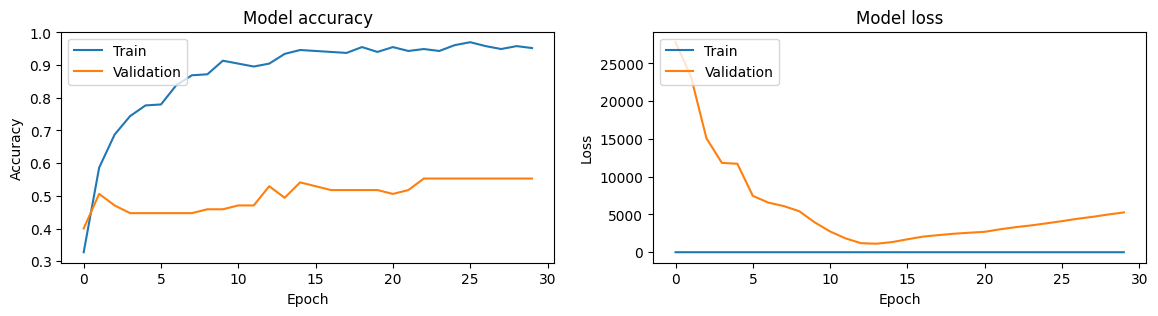

In [29]:
plt.figure(figsize=(14, 3))

plt.subplot(1, 2, 1)
plt.plot(vgg_history.history['accuracy'])
plt.plot(vgg_history.history['val_accuracy'])  
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left') 

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')  

plt.show()